In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.nddata import CCDData
from astropy.coordinates import EarthLocation, SkyCoord, AltAz, get_moon, get_sun
from astropy.visualization import quantity_support, time_support, ZScaleInterval, LinearStretch, SqrtStretch, ImageNormalize
from astropy.time import Time
from astropy.table import Table

import astroplan

from skycam_utils.pipeline import get_ut, stellacam_strip_image, load_strip_image, plot_strip_image
from skycam_utils.astrometry import MMT_LOCATION

In [2]:
quantity_support()
_ = time_support()
MMT = astroplan.Observer(name="MMTO", location=MMT_LOCATION, timezone="US/Arizona", pressure=0*u.mbar)
#%matplotlib widget

In [3]:
ref = fits.open("20191005/image_0001503.fits.gz")[0].data
test = fits.open("20191005/image_0001395.fits.gz")[0].data
ref[:, 319].mean() / test[:, 319].mean()

0.9196901030458009

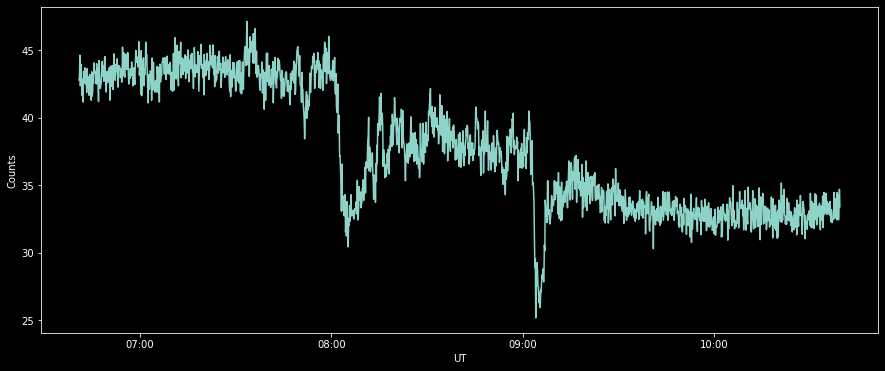

In [4]:
june, june_ut = load_strip_image("strip_20190606.fits")
arr = np.ma.array(june[5:35, :].data.mean(axis=0), mask=june[20, :].mask)
plt.figure(figsize=(15, 6))
plt.plot(june_ut, arr)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator())
plt.xlabel("UT")
plt.ylabel("Counts")
plt.show()

In [5]:
oct, oct_ut = load_strip_image("strip_20191005.fits")


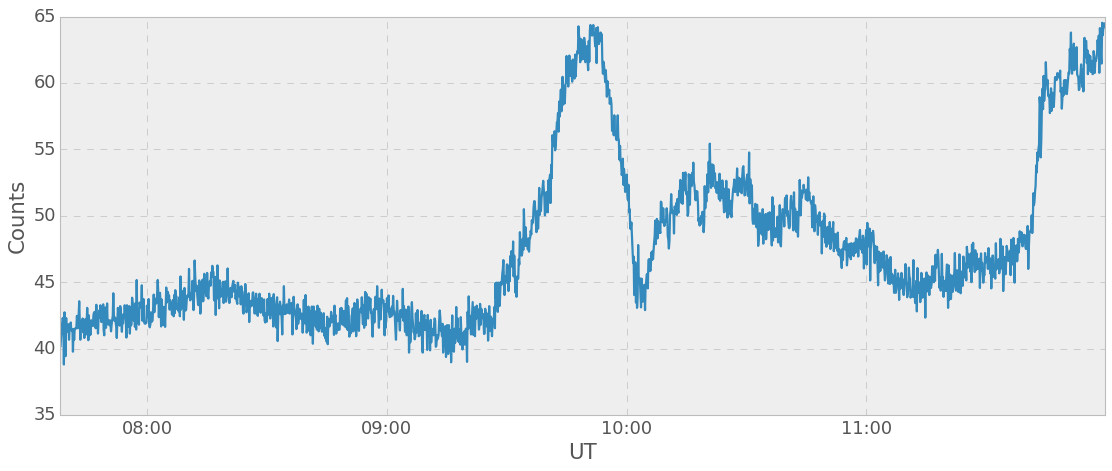

In [25]:
with plt.style.context('bmh'):
    plt.rcParams['font.size'] = 16
    arr = np.ma.array(oct[5:35, :].data.mean(axis=0), mask=oct[20, :].mask)
    plt.figure(figsize=(15, 6))
    plt.plot(oct_ut, arr)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator())
    plt.xlabel("UT")
    plt.ylabel("Counts")
    plt.show()

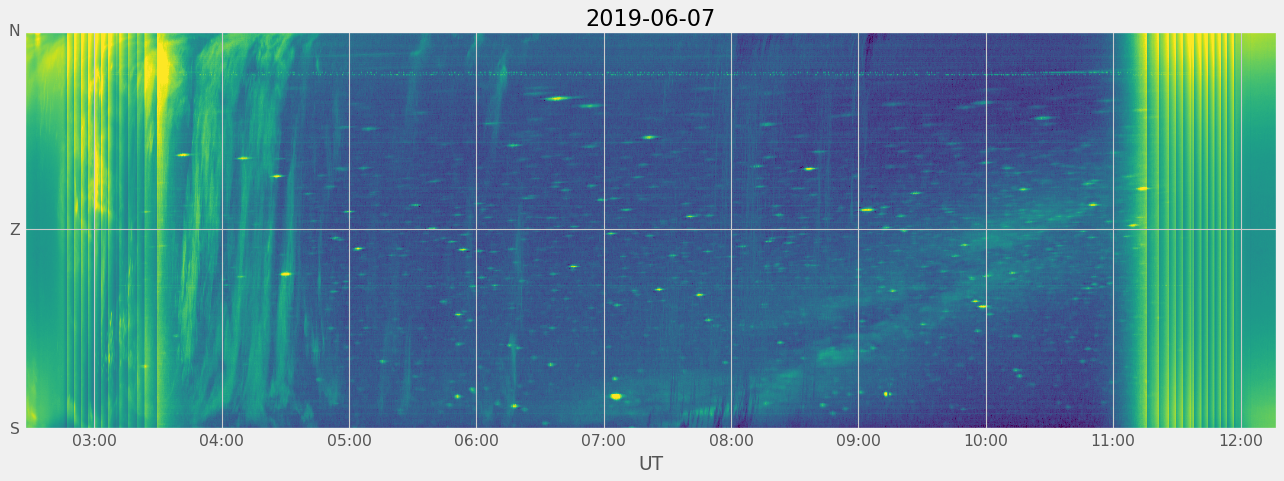

In [26]:
with plt.style.context('fivethirtyeight'):
    fig = plot_strip_image("strip_20190606.fits", masked=False)
    plt.show()

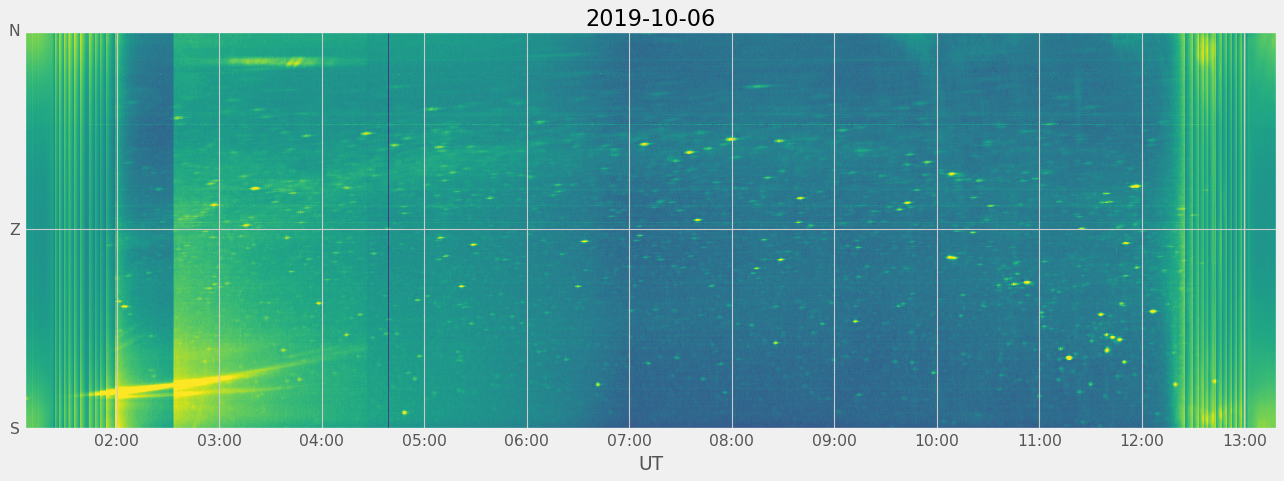

In [18]:
with plt.style.context('fivethirtyeight'):
    fig = plot_strip_image("strip_20191005.fits", masked=False)
    plt.show()

In [12]:
#hdul = stellacam_strip_image("20190607", compressed=False)

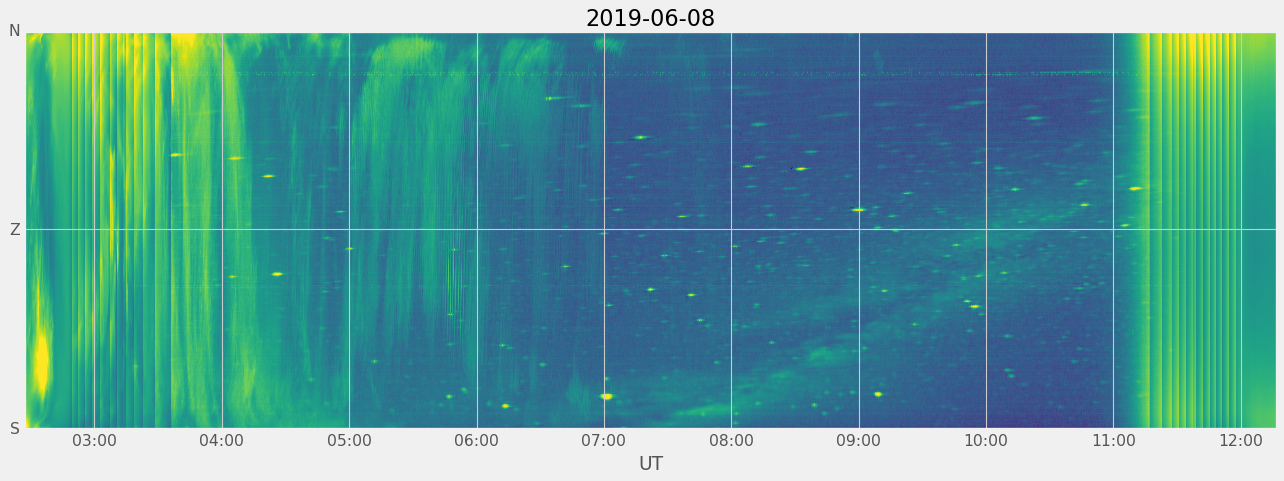

In [20]:
with plt.style.context('fivethirtyeight'):
    fig = plot_strip_image("strip_20190607.fits", masked=False)
    plt.show()

In [30]:
dt = mdates.num2date(oct_ut[-1])
dt.strftime("%Y-%m-%d")

'2019-10-06'